## OpenCV를 이용해 셀카 찍기

In [10]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0) # 웹캠을 카메라로 사용
cap.set(3,640) # width
cap.set(4,480) # heigh

ret, frame = cap.read() # 사진 촬영
frame = cv2.flip(frame, 1) # 죄우 대칭

cv2.imwrite('self camera test.jpg', frame) # 사진 촬영

cap.release()
cv2.destroyAllWindows()

## OpenCV를 이용한 얼굴 인식

In [2]:
# !git clone https://github.com/opencv/opencv.git

'opencv'에 복제합니다...
remote: Enumerating objects: 311033, done.
remote: Counting objects: 100% (257/257), done.
remote: Compressing objects: 100% (178/178), done.
remote: Total 311033 (delta 102), reused 175 (delta 61), pack-reused 310776
오브젝트를 받는 중: 100% (311033/311033), 498.77 MiB | 18.19 MiB/s, 완료.
델타를 알아내는 중: 100% (216441/216441), 완료.
Updating files: 100% (7260/7260), 완료.


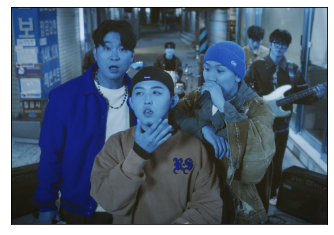

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread('Dynamicduo.png') # 이미지 불러오기
gray = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # BGR에서 RGB로 변환

plt.imshow(image, cmap='gray') # 원하는 사이즈의 픽셀을 원하는 색으로 채워서 만듬(gray)
plt.xticks([]), plt.yticks([]) # 축에 간격을 구분하기 위해 쵸시하는 눈금
plt.show() # 이미지 출력

In [9]:
xml = 'haarcascades/haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(xml)
faces = face_cascade.detectMultiScale(gray, 1.2, 5)

print("Number of faces detected: " + str(len(faces))) # 사람 얼굴 탐지 개수 출력

Number of faces detected: 3


In [10]:
faces # x,y축 좌표값과 얼굴의 높이와 너비인 w,h 값이 리스트 형태

array([[1086,  303,  187,  187],
       [ 465,  145,  274,  274],
       [ 680,  413,  242,  242]], dtype=int32)

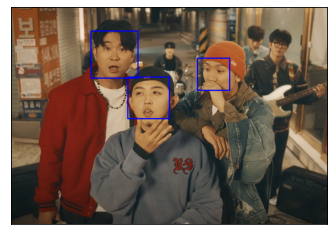

In [12]:
# 이상한 곳을 얼굴로 탐지하지 않고 정화하게 탐지했는지 확인
if len(faces):
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x,y), (x+w, y+h), (255, 0, 0), 5)
        
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

## OpenCV를 이용항 실시간 얼굴 탐지 = OpenCV를 이용해 셀카 찍기 + OpenCV를 이용한 얼굴 인식

In [13]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0) # 웹캠을 카메라로 사용
cap.set(3,640) # width
cap.set(4,480) # heigh

while(True):
    ret, frame = cap.read() # 사진 촬영
    frame = cv2.flip(frame, 1) # 죄우 대칭
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) # BGR에서 RGB로 변환
    
    # 1.05 : ScaleFactor
    # 5 : minNeighbor
    faces = face_cascade.detectMultiScale(gray, 1.05, 5)
    print("Number of faces detected: " + str(len(faces)))

    if len(faces):
        for (x,y,w,h) in faces:
            cv2.rectangle(frame,(x, y),(x+w, y+h),(255, 0, 0), 5)
        
    cv2.imshow('result', frame)
    
    k = cv2.waitKey(30) & 0xff
    if k == 27: # Esc 키를 누르면 종료
        break
    
cap.release() 
cv2.destroyAllWindows()

Number of faces detected: 1
Number of faces detected: 2
Number of faces detected: 2
Number of faces detected: 2
Number of faces detected: 2
Number of faces detected: 2
Number of faces detected: 2
Number of faces detected: 2
Number of faces detected: 2
Number of faces detected: 2
Number of faces detected: 2
Number of faces detected: 2
Number of faces detected: 2
Number of faces detected: 2
Number of faces detected: 2
Number of faces detected: 2
Number of faces detected: 2
Number of faces detected: 2
Number of faces detected: 1
Number of faces detected: 2
Number of faces detected: 2
Number of faces detected: 2
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces dete

KeyboardInterrupt: 